*Суть данного проекта в нахождении лучшей модели, моделирующей поведение функции sin(x)*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import layers, models, utils
from keras.utils import np_utils
from re import Match
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt


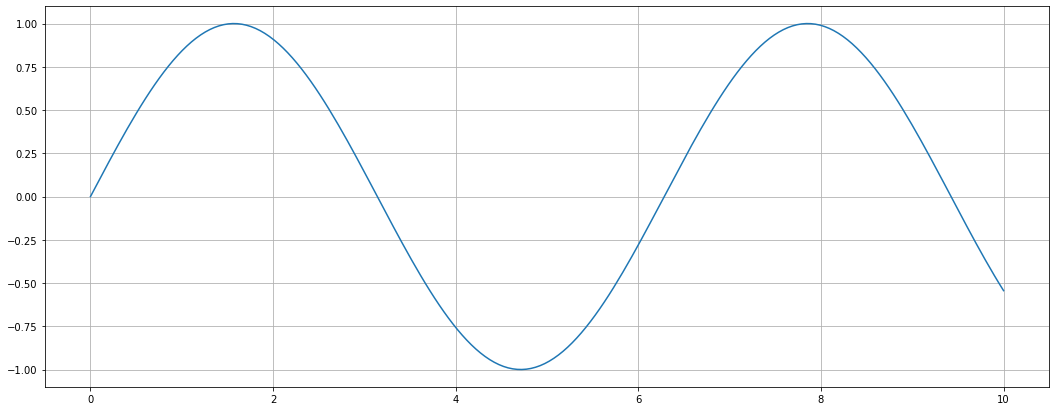

In [ ]:
def get_X_y(step,n):
  X = np.linspace(0,10,200)
  y = np.sin(X)
  return (X,y)
plt.figure(figsize=(18,7))
plt.grid()
X,y = get_X_y(0.25,10)
X_t,y_t = get_X_y(0.5,100)
plt.plot(X,y)

In [ ]:
def plot_history(history, names):
  plt.figure(figsize=(18,7))
  plt.grid()
  mas_legend = []
  for i in range(0,len(history)):
    plt.plot(history[i].history['mae'])
    mas_legend.append(names[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(mas_legend, loc='upper left')
  plt.show()

def plot_predict_long(X,y,names,predicts):
  plt.figure(figsize=(18,5))
  plt.grid()
  mas_legend = []
  plt.plot(X,y)
  plt.plot(X,predicts)
  mas_legend.append('sin(x)')
  mas_legend.append(names)
  plt.title('predict')
  plt.ylabel('y')
  plt.xlabel('x')
  plt.legend(mas_legend, loc='upper left')
  plt.show()

def get_history(loss,optimizer,epochs=100):
  model = models.Sequential()
  model.add(layers.Dense(50, activation='tanh', input_shape=(1,)))
  model.add(layers.Dense(25, activation='tanh', input_shape=(50,)))
  model.add(layers.Dense(10, activation='tanh', input_shape=(25,)))
  model.add(layers.Dense(1, activation='tanh'))
  model.compile(loss=loss, optimizer=optimizer, metrics=['mae','acc'])
  history=model.fit(X, y, validation_data=(X_t, y_t), epochs=epochs, batch_size=5)
  predict = model.predict(X)
  return [history,predict]

In [ ]:
histories = []
predicts = []
names = []
for loss in ['mean_squared_error','log_cosh','mean_absolute_error','huber_loss']:
  for optimizer in ['adam','SGD','Adadelta','Adagrad','Nadam']:
    res = get_history(loss,optimizer)
    histories.append(res[0])
    predicts.append(res[1])
    names.append(loss+" "+optimizer)

Epoch 1/100
40/40 [==============================] - 5s 33ms/step - loss: 0.4852 - mae: 0.6032 - acc: 0.0050 - val_loss: 0.4582 - val_mae: 0.5751 - val_acc: 0.0050
Epoch 2/100
40/40 [==============================] - 1s 23ms/step - loss: 0.4163 - mae: 0.5731 - acc: 0.0050 - val_loss: 0.3902 - val_mae: 0.5463 - val_acc: 0.0050
Epoch 3/100
40/40 [==============================] - 1s 25ms/step - loss: 0.3881 - mae: 0.5461 - acc: 0.0050 - val_loss: 0.3609 - val_mae: 0.5311 - val_acc: 0.0050
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 0.3720 - mae: 0.5383 - acc: 0.0050 - val_loss: 0.3427 - val_mae: 0.5173 - val_acc: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 1s 25ms/step - loss: 0.3832 - mae: 0.5307 - acc: 0.0000e+00 - val_loss: 0.3522 - val_mae: 0.5249 - val_acc: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 1s 17ms/step - loss: 0.3602 - mae: 0.5241 - acc: 0.0000e+00 - val_loss: 0.3729 - val_mae: 0.5126 - val_acc: 0.0000e

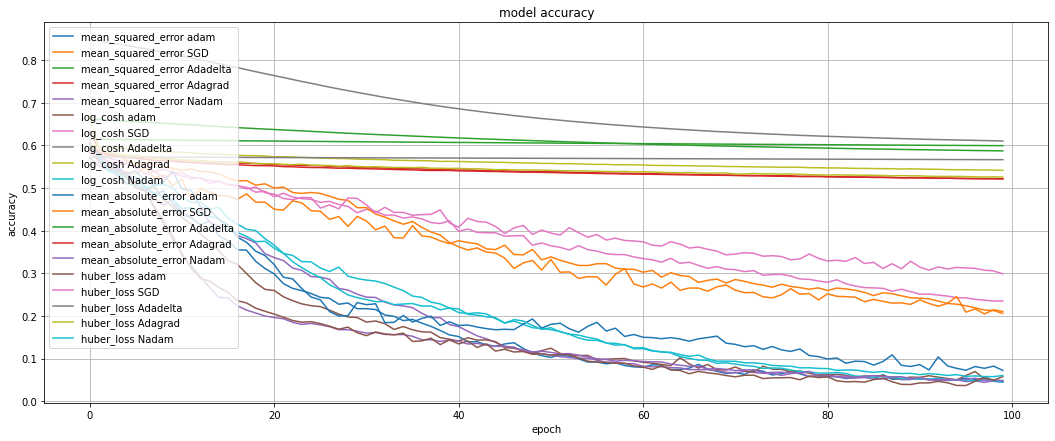

200
200


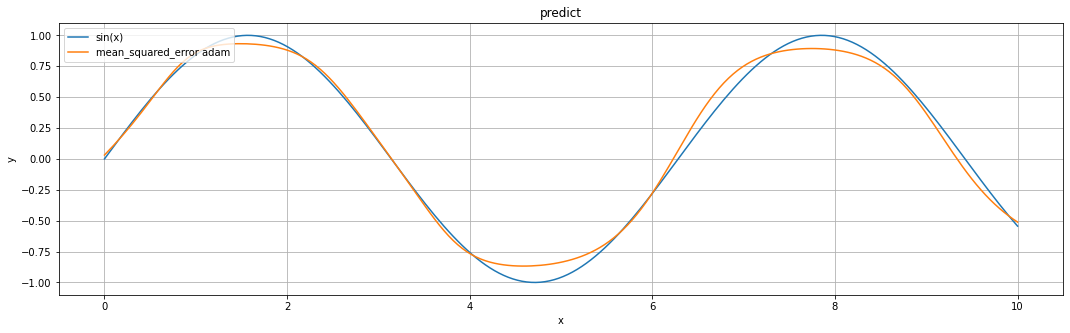

200
200


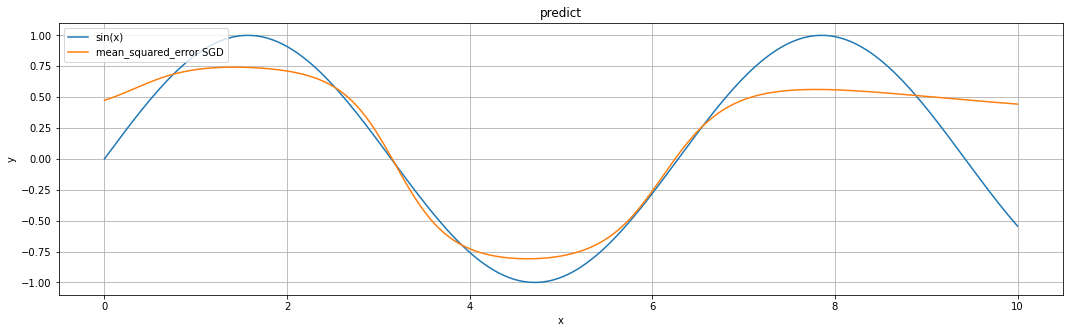

200
200


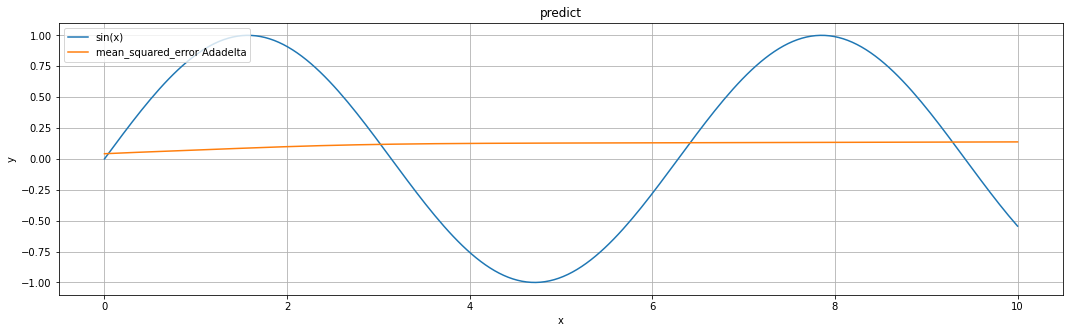

200
200


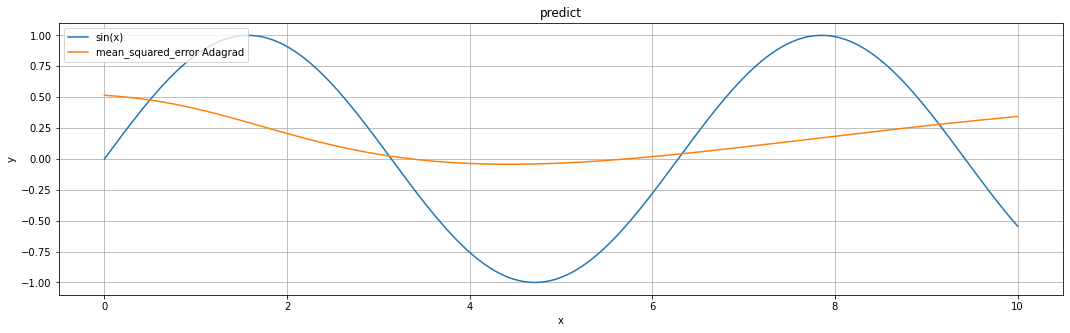

200
200


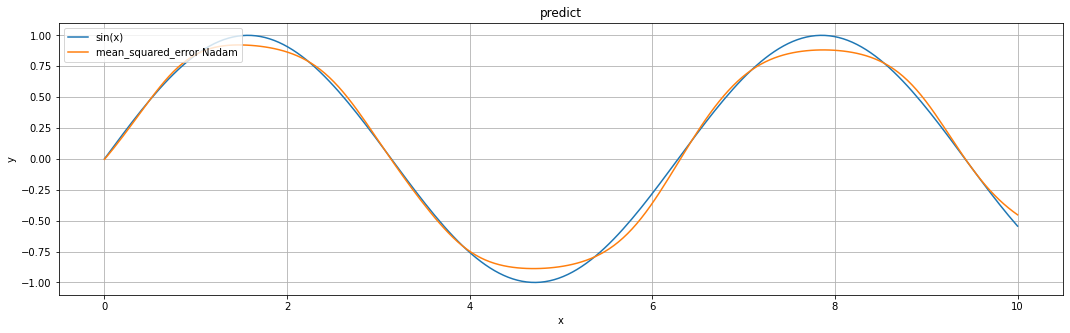

200
200


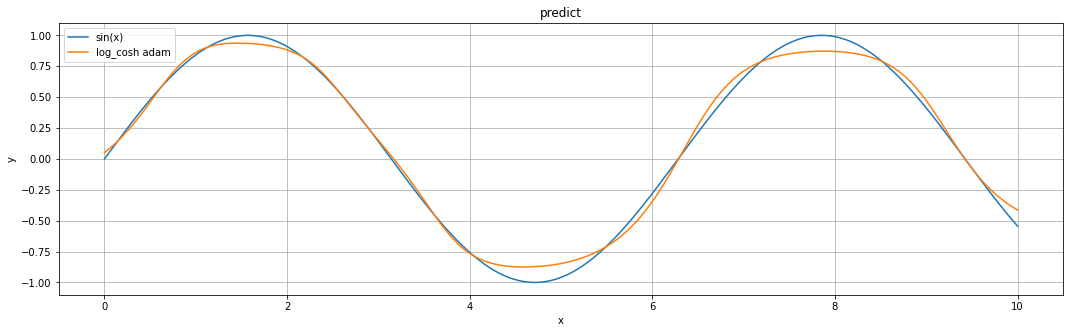

200
200


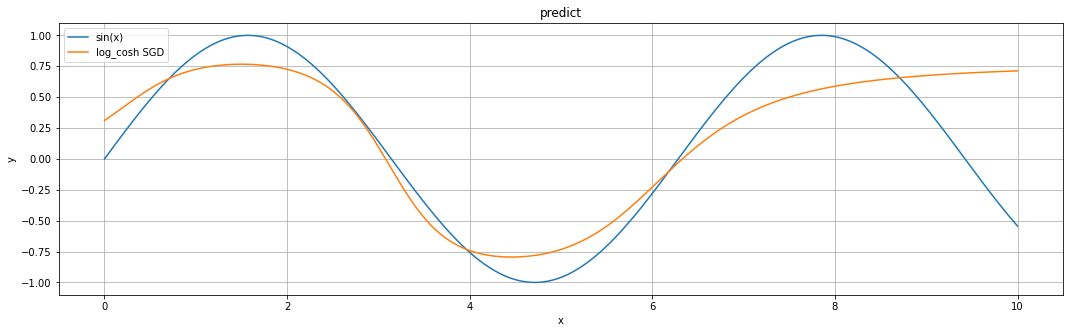

200
200


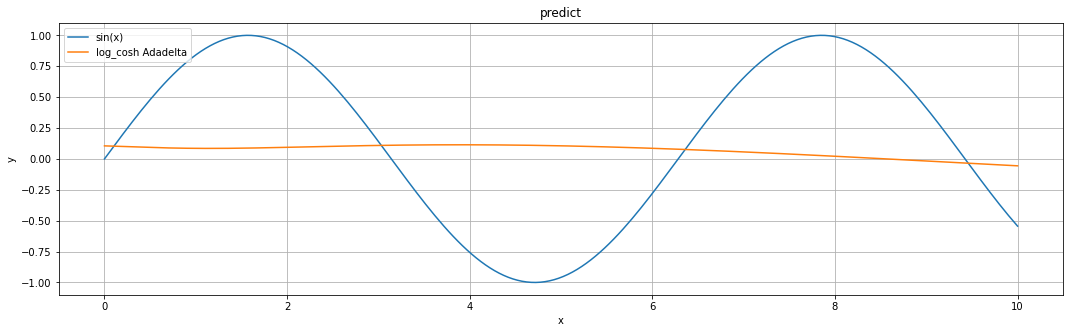

200
200


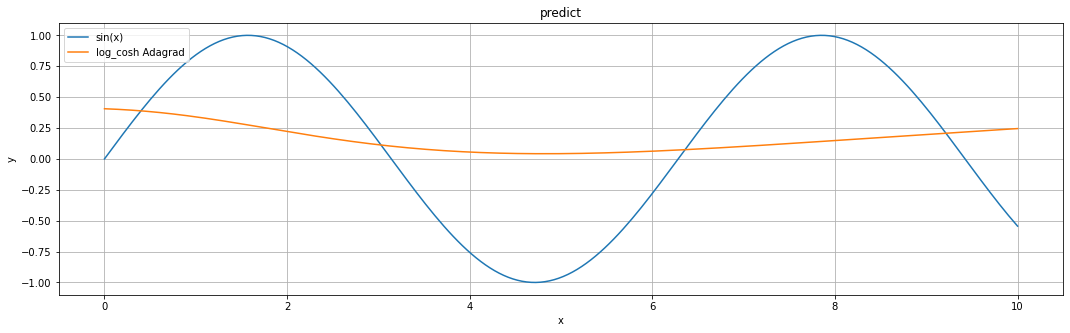

200
200


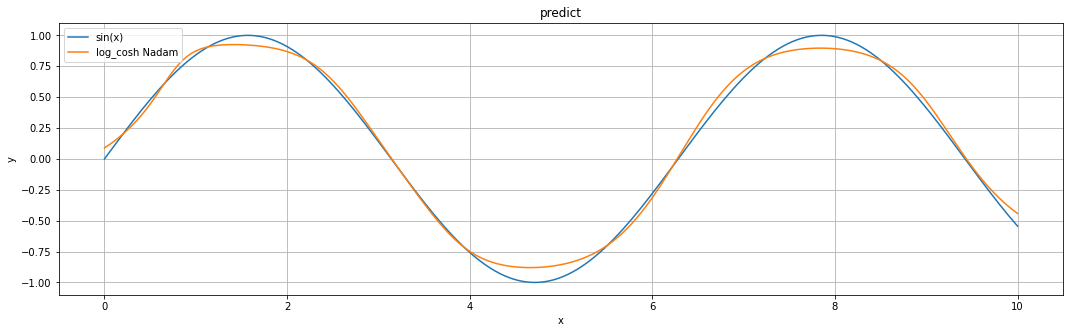

200
200


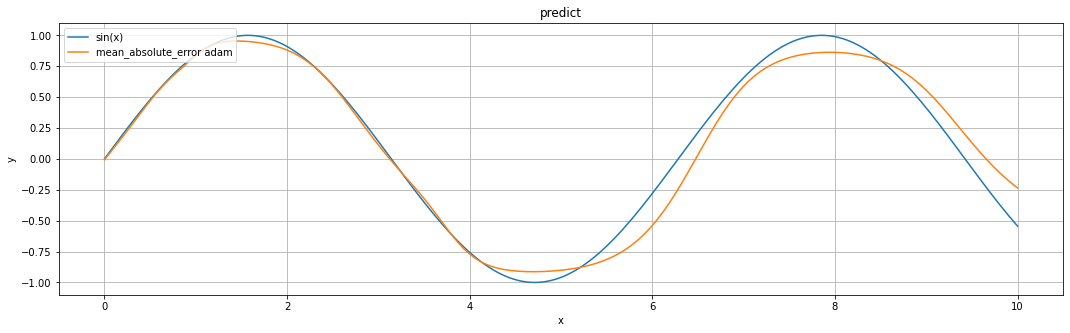

200
200


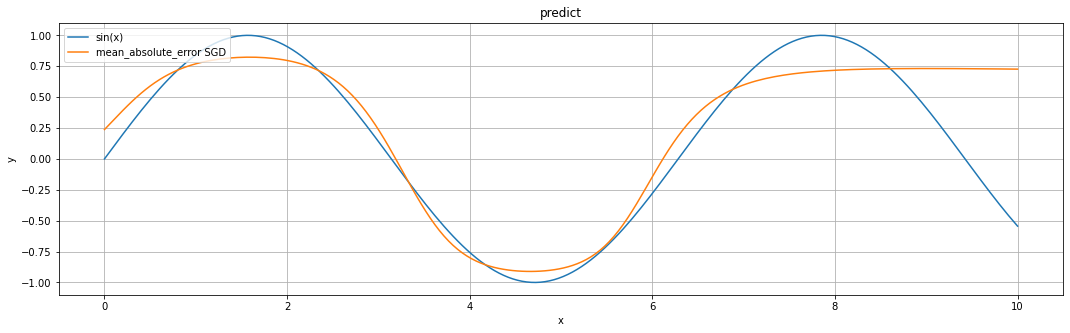

200
200


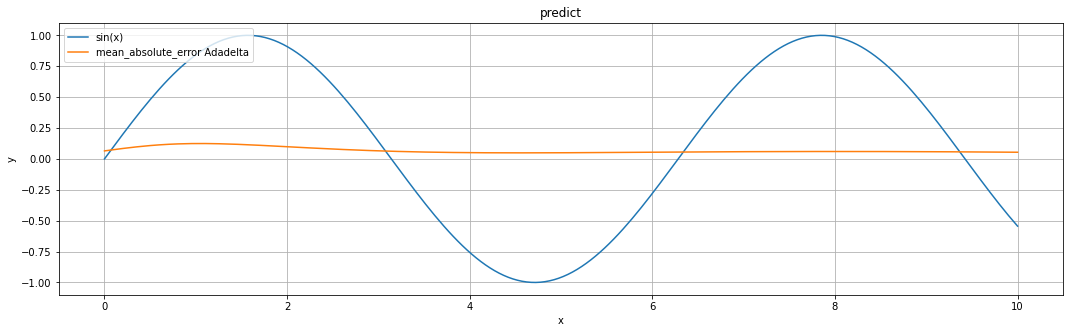

200
200


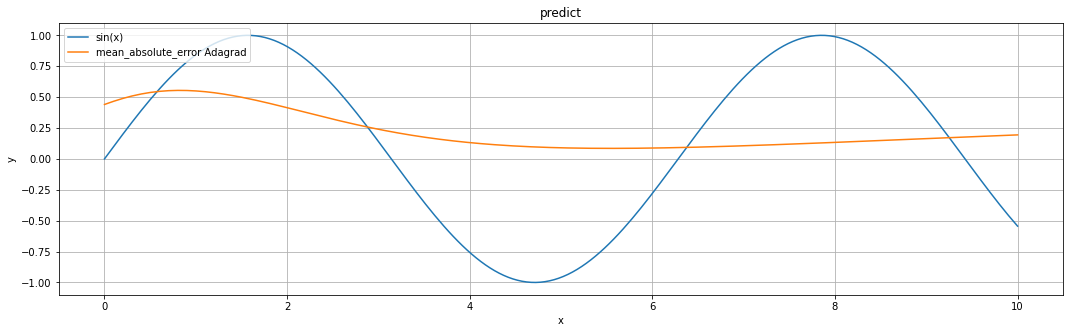

200
200


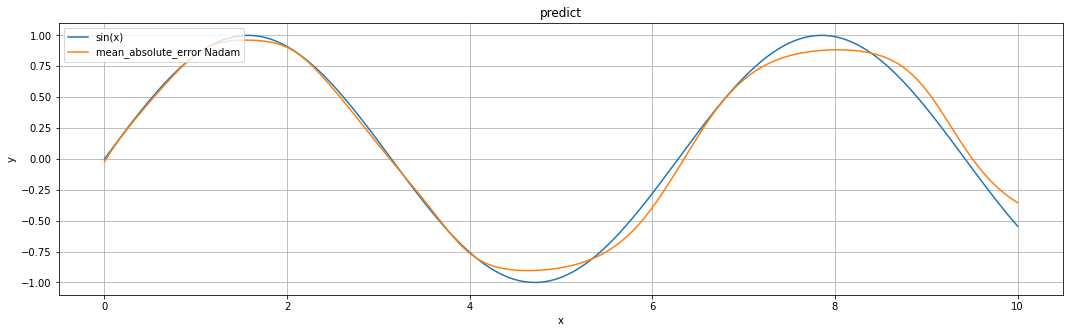

200
200


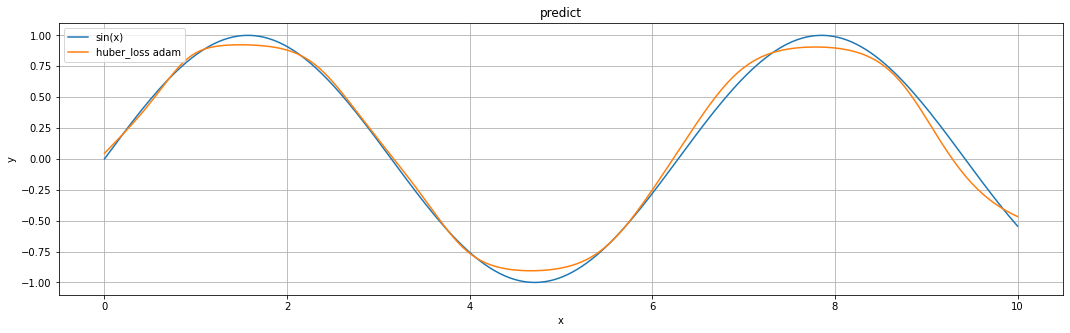

200
200


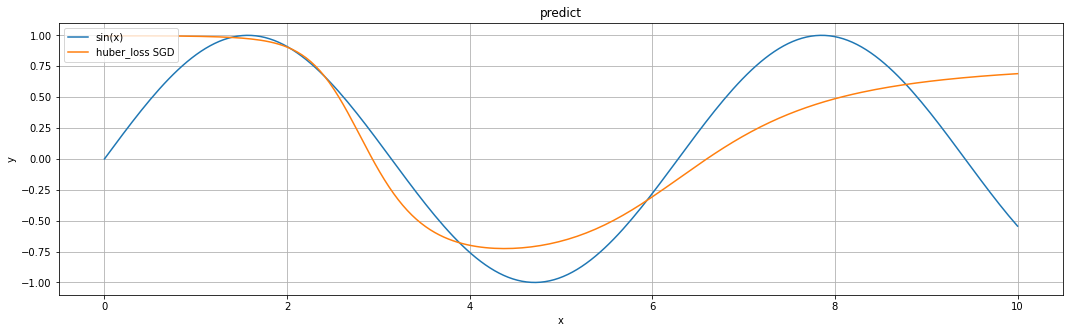

200
200


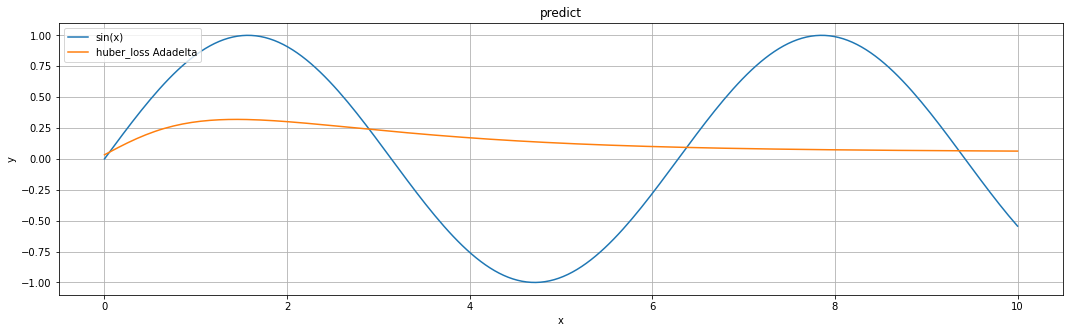

200
200


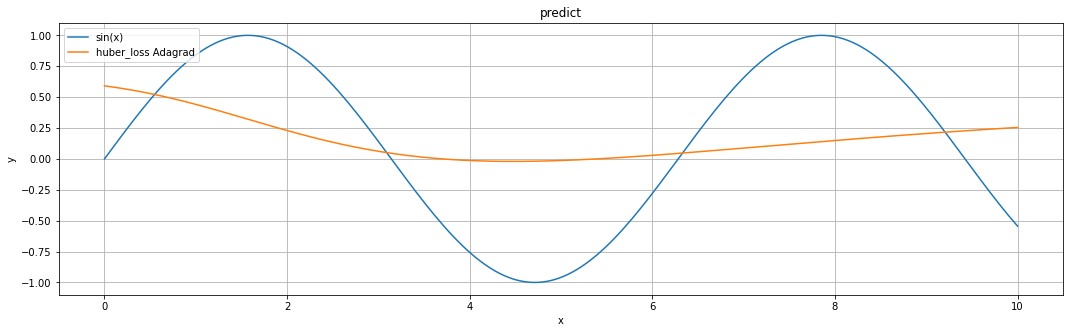

200
200


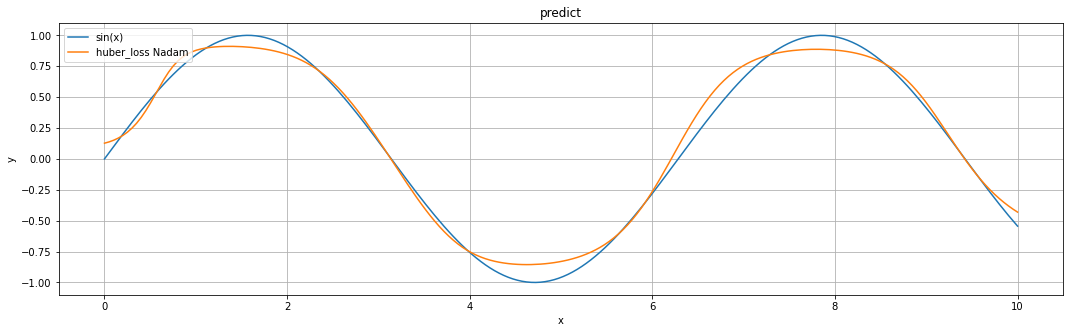

In [ ]:
#print(histories[0].history)
#print(predicts[0])
plot_history(histories,names)
i = 0
for predict in predicts:
  print(len(X))
  print(len(predict))
  plot_predict_long(X,y,names[i],predict)
  i+=1
